This notebook load and visualize previously recorded data.

In [1]:
cd ..

c:\Code\Armband


In [2]:
import os
import time
import numpy as np


import brainflow
from brainflow.data_filter import DataFilter, FilterTypes, AggOperations
from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds, BrainFlowError

from tqdm.notebook import tqdm
import datetime
from matplotlib import pyplot as plt

from utils.armband import init
from utils.visualize import showMe
from utils.signal import DCFilter
from config.armband import *
from IPython.display import clear_output

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
path = 'data/Gyuri3/'
post_fix = ''

sessions = []
for session in os.listdir(path):
    Stack = {}
    for c in settings["classes"]:
        class_data = []
        data = np.load(os.path.join(path, session, c+post_fix+'.npy'),allow_pickle=True)
        if data.shape[0] != 0:
            class_data.append(data)
        Stack[c] = class_data
    sessions.append(Stack)

In [4]:
print(len(sessions))

10


Rest


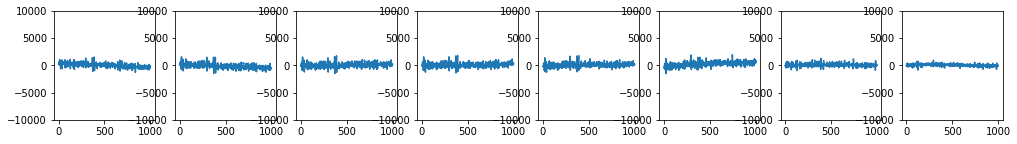

Left


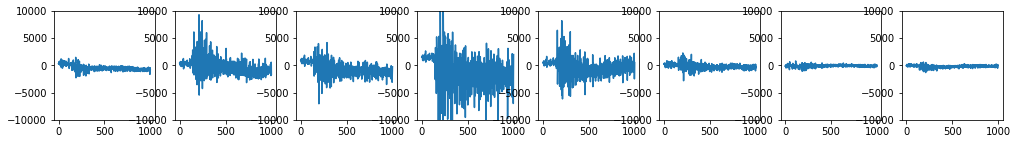

Right


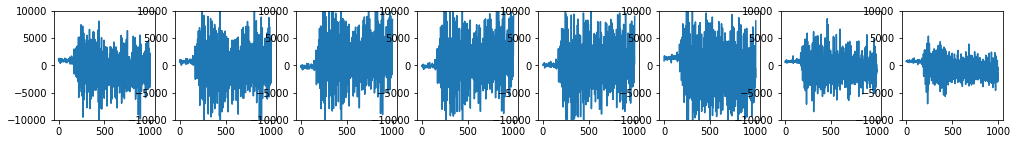

Fist


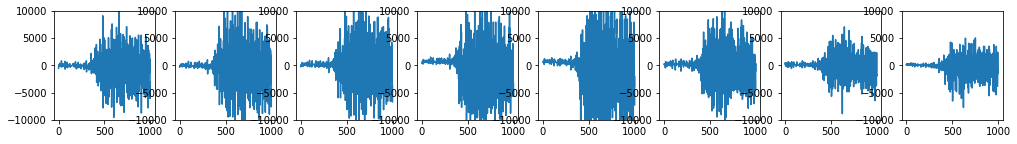

KeyboardInterrupt: Interrupted by user

In [5]:
for session in sessions:
    for Stack in session:
        print(Stack)
        sample = session[Stack][0][0]
        showMe(sample)
    input('Next')
    clear_output()
    